In [1]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx



In [2]:

#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
fly_nums = list(range(1389,1402))



multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df



Making dataframe for fly number 1389
Making dataframe for fly number 1390
Making dataframe for fly number 1391
Making dataframe for fly number 1392
Making dataframe for fly number 1393
Making dataframe for fly number 1395
Making dataframe for fly number 1396
Making dataframe for fly number 1397
Making dataframe for fly number 1398
Making dataframe for fly number 1399
Making dataframe for fly number 1400
Making dataframe for fly number 1401


In [3]:
flylist = [flb.NetFly(fn) for fn in range(1389,1402)]
[fly.open_signals() for fly in flylist]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [4]:
multi_fly_df['l_plus_r'] = multi_fly_df['left_amp'] + multi_fly_df['right_amp']
all_stim_df = multi_fly_df


In [6]:
multi_fly_df.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
0,0.000000,pretrial_stripe_fix,NaN,NaN,NaN,1389,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,NaN
1,0.020000,pretrial_stripe_fix,NaN,NaN,NaN,1389,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,NaN
2,0.040001,pretrial_stripe_fix,NaN,NaN,NaN,1389,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,NaN
3,0.060001,pretrial_stripe_fix,NaN,NaN,NaN,1389,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,NaN
4,0.080002,pretrial_stripe_fix,NaN,NaN,NaN,1389,0.0,condition=pretrial_closed_loop;gain=-1,1.186526,1.537965,...,0.0,2.973134,0.549872,22.93889,0.424018,0.284354,1.161884,0.0,0.0,NaN


In [7]:
multi_fly_df.to_csv('multi_fly_df.csv')

In [8]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right' 'l_plus_r']
['cl_blocks, g_x=-1, g_y=-4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=-4 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=-8, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=0, b_y=0'
 'cl_blocks, g_x=-1, g_y=4 b_x=8, b_y=0'
 'ol_blocks, g_x=-12, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=0 b_x=0, b_y=0'
 'ol_blocks, g_x=0, g_y=4 b_x=0

In [9]:

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [10]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']


In [11]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [12]:
turn_left.head()

,t,stimulus,amp_diff,left_amp,right_amp,fly_num,wbf,experimental_condition,pr_left,tpd_left,...,hg3_right,hg1_right,i1_right,bkg_right,b1_right,b2_right,b3_right,iii24_right,hg4_right,l_plus_r
4291,85.821814,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.259057,1.113822,0.854764,1389,196.5,condition=baseline,2.353217,1.847417,...,0.0,8.638967,3.367114,31.649204,5.551908,0.609672,10.314173,1.345080,2.325033,1.968586
4292,85.841815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936,NaN
4293,85.861815,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",NaN,NaN,0.881334,1389,196.5,condition=baseline,2.340178,1.837865,...,0.0,9.141731,3.340759,31.620682,5.624682,0.572844,10.237155,0.791526,2.482936,NaN
4294,85.881816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.5,condition=baseline,2.324724,1.847873,...,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296,2.001799
4295,85.901816,"cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0",0.225845,1.113822,0.887977,1389,196.0,condition=baseline,2.324724,1.847873,...,0.0,8.691837,3.224332,31.643182,5.629723,0.585628,10.231885,0.539328,2.294296,2.001799


In [15]:
##### for the WSA/ kinemcatics column

In [13]:
y = turn_left.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

150

In [14]:
new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

In [15]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds[counter-1]: trial_ind] = counter
    counter += 1

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/pandas/core/series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/home/imag

In [ ]:
counter = 0
turn_left['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_left['trial'][0:trial_ind] = counter
    else: 
        turn_left['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

In [16]:
#d = pd.DataFrame()
main_df = pd.DataFrame()
dfe= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_left.loc[(turn_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df[counter] = ee
        if len(ee) >= 450:
            main_df[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]



In [17]:
main_df.head()

,0,2,4,6,8,10,12,14,16,18,...,130,132,134,136,138,140,142,144,146,148
0,0.259057,NaN,-0.139492,0.365337,0.199275,0.431762,0.179347,0.146135,0.146135,NaN,...,-0.241025,0.284286,-0.055621,0.241025,-0.067981,0.296646,0.333727,0.185404,-0.309007,NaN
1,NaN,NaN,-0.139492,0.338767,0.199275,0.478260,0.179347,0.159420,0.172705,NaN,...,-0.234845,0.333727,-0.012360,0.234845,-0.061801,0.296646,0.364628,0.197764,-0.364628,NaN
2,NaN,NaN,-0.132850,0.338767,0.146135,0.531400,0.179347,0.205917,0.132850,0.371980,...,-0.234845,0.333727,-0.030901,0.222485,-0.067981,0.259566,0.346088,0.197764,-0.364628,NaN
3,0.225845,NaN,-0.132850,0.332125,0.073067,0.531400,0.179347,0.205917,0.172705,NaN,...,-0.265746,0.290466,0.006180,0.216305,-0.061801,0.309007,0.346088,0.197764,-0.376988,NaN
4,0.225845,NaN,-0.146135,0.332125,0.092995,0.604467,NaN,0.159420,0.059782,0.411835,...,-0.265746,0.278106,0.037081,0.216305,-0.030901,0.309007,0.346088,0.197764,-0.376988,NaN


In [18]:
from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA = np.mean(main_df, axis =1)  #mean
#error = main_df.stack().std()  
error = main_df.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

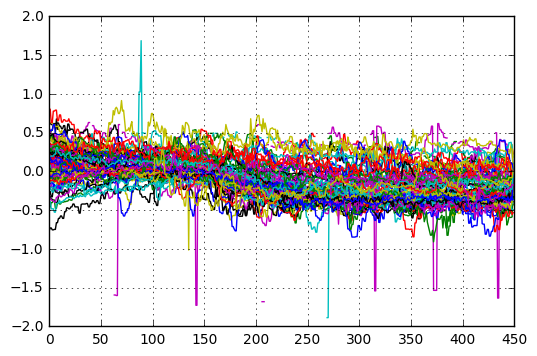

In [19]:
len(mean_WBA)

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

In [20]:
y2 = turn_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
turn_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        turn_right['trial'][0:trial_ind] = counter
    else: 
        turn_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_turn_right = pd.DataFrame()
dfe_turn_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = turn_right.loc[(turn_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_turn_right[counter] = ee
        if len(ee) >= 450:
            main_df_turn_right[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_turn_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_turn_right = np.mean(main_df_turn_right, axis =1)  #mean
#error = main_df.stack().std()  
error_turn_right = main_df_turn_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
y2 = WSA_increase.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
WSA_increase['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        WSA_increase['trial'][0:trial_ind] = counter
    else: 
        WSA_increase['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = WSA_increase.loc[(WSA_increase['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_up[counter] = ee
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_WSA_increase = np.mean(main_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_WSA_increase = main_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
y2 = WSA_decrease.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
WSA_decrease['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        WSA_decrease['trial'][0:trial_ind] = counter
    else: 
        WSA_decrease['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = WSA_decrease.loc[(WSA_decrease['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_down[counter] = ee
        if len(ee) >= 450:
            main_df_pitch_down[counter] = ee[0:450]    
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_WSA_decrease = np.mean(main_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_WSA_decrease = main_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
def rad_to_deg (rad):
    r_deg = np.rad2deg((rad)/10 *2*np.pi)
    return r_deg

In [24]:
time =inds/50.

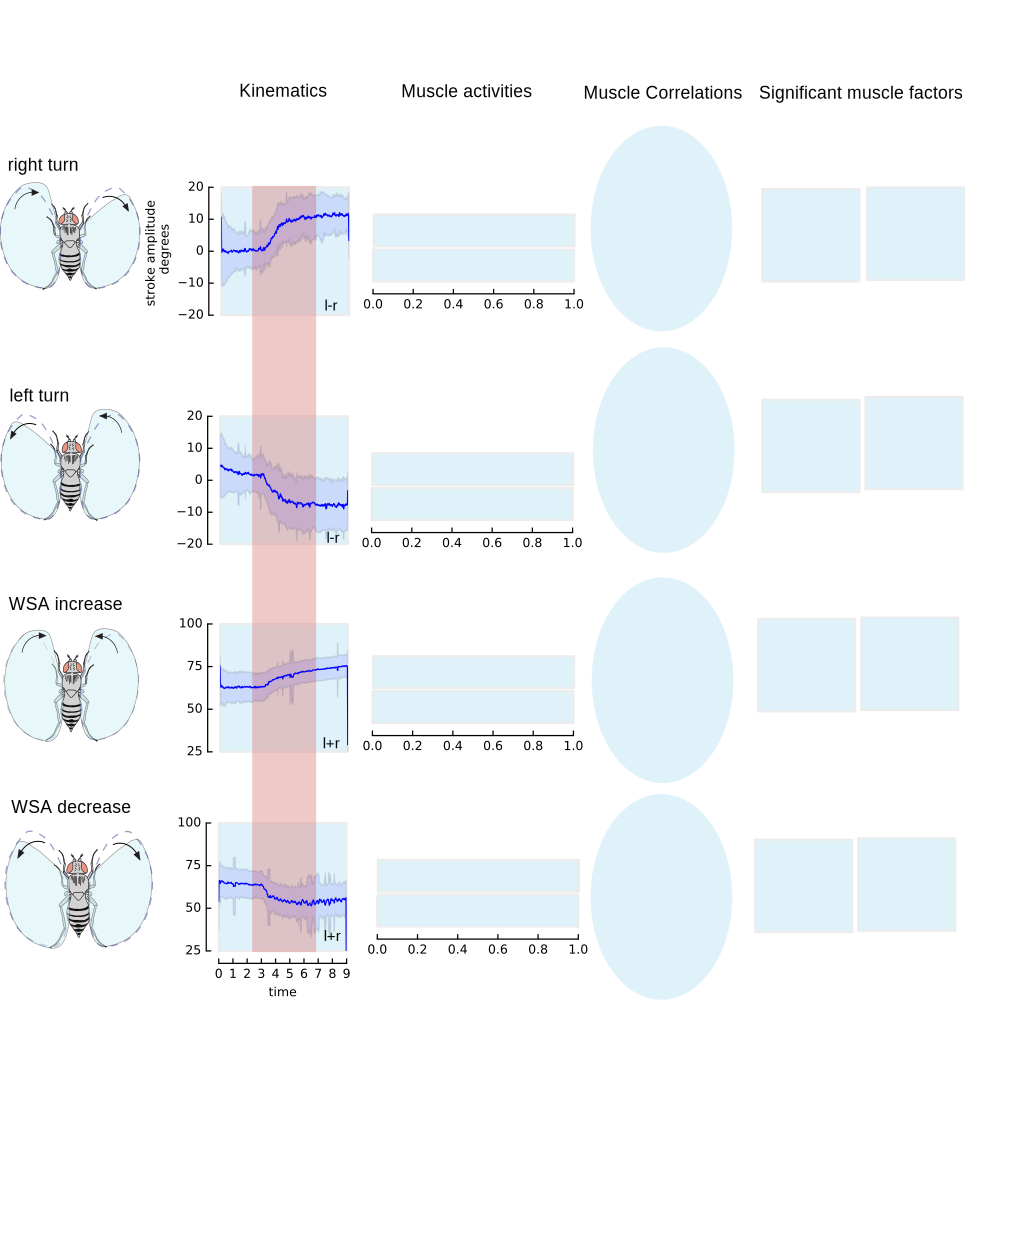

In [35]:


layout = fifi.FigureLayout('paper_figure_2_v3.svg',make_mplfigures = True)

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA)) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)),alpha = 0.1)
layout.axes['l_turn_lmr'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_turn_right)) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_turn_right-error_turn_right)), rad_to_deg(mean_WBA_turn_right + error_turn_right),alpha = 0.1)
layout.axes['r_turn_lmr'].set_ybound(-20, 20)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')
layout.axes['r_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['WSA_dec_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_increase)) #,'o',alpha = 0.2)
layout.axes['WSA_dec_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_increase-error_WSA_increase), rad_to_deg(mean_WBA_WSA_increase + error_WSA_increase),alpha = 0.1)
layout.axes['WSA_dec_lpr'].set_ybound(25, 100)
layout.axes['WSA_dec_lpr'].set_xlabel('time')
layout.axes['WSA_dec_lpr'].set_yticks([25, 50, 75, 100])

layout.axes['WSA_inc_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_decrease)) #,'o',alpha = 0.2)
layout.axes['WSA_inc_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_decrease-error_WSA_decrease), rad_to_deg(mean_WBA_WSA_decrease + error_WSA_decrease),alpha = 0.1)
layout.axes['WSA_inc_lpr'].set_ybound(25, 100)
layout.axes['WSA_inc_lpr'].set_yticks([25, 50, 75, 100])



fifi.mpl_functions.set_spines(layout)
layout.save('figure_2.svg')
plt.close('all')
display(SVG('figure_2.svg'))

In [111]:
#multi_fly_df = multi_fly_df.fillna(0)

multi_fly_df.fillna(0, inplace=True)

AttributeError: 'NoneType' object has no attribute 'fillna'

In [ ]:
#### Now activity matrices 




filtered_df_turn_left = multi_fly_df.loc[multi_fly_df['amp_diff'] >= 0]

filtered_df_turn_right = multi_fly_df.loc[multi_fly_df['amp_diff'] <= 0]

mean_left_amp = np.mean(multi_fly_df.left_amp)

mean_right_amp = np.mean(multi_fly_df.right_amp)

mean_right_amp_int = int(mean_right_amp)
mean_left_amp_int = int(mean_left_amp)

WSA_increase = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.1) & (multi_fly_df['right_amp'] >= mean_right_amp*1.1)]

WSA_left_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] >= mean_left_amp*1.12) & (multi_fly_df['right_amp'] <= mean_right_amp*.89)]

WSA_right_turn = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.95) & (multi_fly_df['right_amp'] >= mean_right_amp*1.25)]

WSA_decrease = multi_fly_df.loc[(multi_fly_df['left_amp'] <= mean_left_amp*.9) & (multi_fly_df['right_amp'] <= mean_right_amp*.9)]

In [28]:
turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']


In [29]:

filtered_df_turn_left = multi_fly_df.loc[multi_fly_df['amp_diff'] >= 0]

filtered_df_turn_right = multi_fly_df.loc[multi_fly_df['amp_diff'] <= 0]

mean_left_amp = np.mean(multi_fly_df.left_amp)

mean_right_amp = np.mean(multi_fly_df.right_amp)

mean_right_amp_int = int(mean_right_amp)
mean_left_amp_int = int(mean_left_amp)

WSA_increase_kine = WSA_increase.loc[(WSA_increase['left_amp'] <= mean_left_amp) & (WSA_increase['right_amp'] <= mean_right_amp)]

left_turn_kine = turn_left.loc[(turn_left['left_amp'] >= mean_left_amp) & (turn_left['right_amp'] <= mean_right_amp)]

right_turn_kine = turn_right.loc[(turn_right['left_amp'] <= mean_left_amp) & (turn_right['right_amp'] >= mean_right_amp)]

WSA_decrease_kine = WSA_decrease.loc[(WSA_decrease['left_amp'] >= mean_left_amp) & (WSA_decrease['right_amp'] >= mean_right_amp)]

In [30]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [32]:

fly = flylist[1]
#snum = 5
snum = 3

#df.loc[df['Value'].idxmax()]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

b2 = fly.normed_signals['left', 'b2']

#x = b2

#Normalized Data
normalized = (x-min(x))/(max(x)-min(x))

def normd (muscle_data):
    x = muscle_data
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

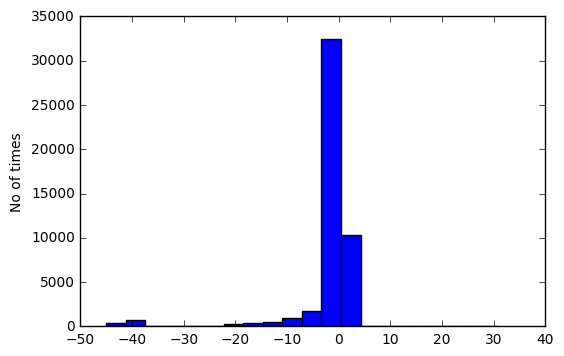

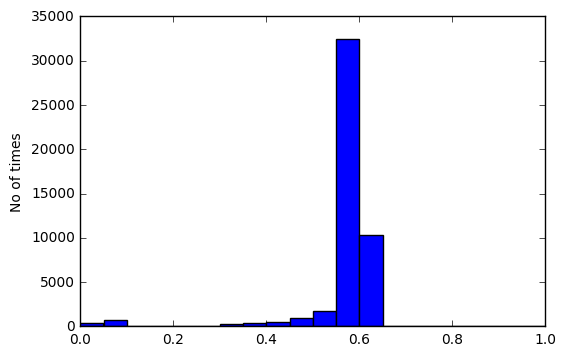

In [34]:
b1 = fly.normed_signals['left', 'b1']
np.mean(fly.normed_signals['left', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['left', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

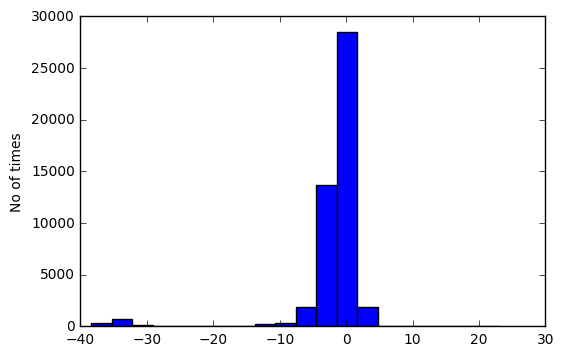

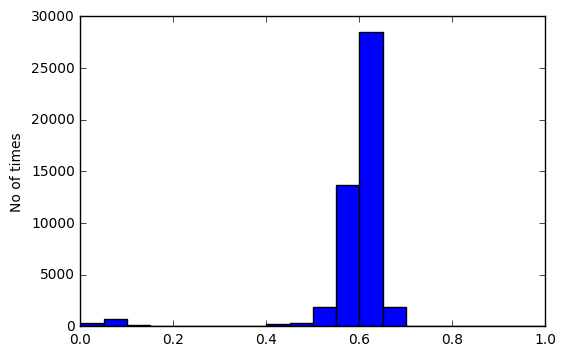

In [33]:
b1 = fly.normed_signals['right', 'b1']
np.mean(fly.normed_signals['right', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['right', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

In [ ]:
b1l = fly.normed_signals['left', 'b1'][idxs]
b1r = fly.normed_signals['right', 'b1'][idxs]

b2l = fly.normed_signals['left', 'b2'][idxs]
b2r = fly.normed_signals['right', 'b2'][idxs]

b3l = fly.normed_signals['left', 'b3'][idxs]
b3r = fly.normed_signals['right', 'b3'][idxs]

i1l = fly.normed_signals['left', 'i1'][idxs]
i1r = fly.normed_signals['right', 'i1'][idxs]

i2l = fly.normed_signals['left', 'i2'][idxs]
i2r = fly.normed_signals['right', 'i2'][idxs]

iii1l = fly.normed_signals['left', 'iii1'][idxs]
iii1r = fly.normed_signals['right', 'iii1'][idxs]

iii3l = fly.normed_signals['left', 'iii3'][idxs]
iii3r = fly.normed_signals['right', 'iii3'][idxs]

hg1l = fly.normed_signals['left', 'hg1'][idxs]
hg1r = fly.normed_signals['right', 'hg1'][idxs]

hg2l = fly.normed_signals['left', 'hg2'][idxs]
hg2r = fly.normed_signals['right', 'hg2'][idxs]

hg3l = fly.normed_signals['left', 'hg3'][idxs]
hg3r = fly.normed_signals['right', 'hg3'][idxs]

hg4l = fly.normed_signals['left', 'hg4'][idxs]
hg4r = fly.normed_signals['right', 'hg4'][idxs]

In [ ]:
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
repeats = np.arange(6)

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
    
per_fly_means_b1l = []
per_fly_means_b2l = []    
per_fly_means_b3l = []    
per_fly_means_i1l = []    
per_fly_means_i2l = []    
per_fly_means_iii1l = []    
per_fly_means_iii3l = []    
per_fly_means_hg1l = []    
per_fly_means_hg2l = []    
per_fly_means_hg3l = []    
per_fly_means_hg4l = []    

per_fly_means_b1r = []
per_fly_means_b2r = []    
per_fly_means_b3r = []    
per_fly_means_i1r = []    
per_fly_means_i2r = []    
per_fly_means_iii1r = []    
per_fly_means_iii3r = []    
per_fly_means_hg1r = []    
per_fly_means_hg2r = []    
per_fly_means_hg3r = []    
per_fly_means_hg4r = []   
  
    
for fly in flylist:
    
    for snum in repeats: 
        
    
        b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
        b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

        b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
        b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

        b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
        b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

        i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
        i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

        i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
        i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

        iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
        iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

        iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
        iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

        hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
        hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

        hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
        hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

        hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
        hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

        hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
        hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]
    
        #df=(right_turn_kine.loc[right_turn_kine['fly_num']==flynum])
        #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
        muscle_matrix_l = np.vstack([b1l, b2l, b3l, i1l, i2l, iii1l, iii3l, hg1l, hg2l, hg3l, hg4l])
        muscle_matrix_r = np.vstack([b1r, b2r, b3r, i1r, i2r, iii1r, iii3r, hg1r, hg2r, hg3r, hg4r])
        #state_mtrx = np.vstack([df[key] for key in sorted_keys])
        #average_activity = np.mean(state_mtrx,axis = 1)[:,None]
        #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
        #centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
        b1l_mean = np.mean(b1l)
        b2l_mean = np.mean(b2l)
        b3l_mean = np.mean(b3l)
        
        i1l_mean = np.mean(i1l)
        i2l_mean = np.mean(i2l)
        
        iii1l_mean = np.mean(iii1l)
        iii3l_mean = np.mean(iii3l)
        
        hg1l_mean = np.mean(hg1l)
        hg2l_mean = np.mean(hg2l)
        hg3l_mean = np.mean(hg3l)
        hg4l_mean = np.mean(hg4l)
        
        b1r_mean = np.mean(b1r)
        b2r_mean = np.mean(b2r)
        b3r_mean = np.mean(b3r)
        
        i1r_mean = np.mean(i1r)
        i2r_mean = np.mean(i2r)
        
        iii1r_mean = np.mean(iii1r)
        iii3r_mean = np.mean(iii3r)
        
        hg1r_mean = np.mean(hg1r)
        hg2r_mean = np.mean(hg2r)
        hg3r_mean = np.mean(hg3r)
        hg4r_mean = np.mean(hg4r)
        
        per_fly_means_b1l.append(b1l_mean)
        per_fly_means_b2l.append(b2l_mean) 
        per_fly_means_b3l.append(b3l_mean)   
        per_fly_means_i1l.append(i1l_mean)    
        per_fly_means_i2l.append(i2l_mean)   
        per_fly_means_iii1l.append(iii1l_mean)   
        per_fly_means_iii3l.append(iii3l_mean)  
        per_fly_means_hg1l.append(hg1l_mean)   
        per_fly_means_hg2l.append(hg2l_mean)  
        per_fly_means_hg3l.append(hg3l_mean)   
        per_fly_means_hg4l.append(hg4l_mean) 
        
        per_fly_means_b1r.append(b1r_mean)
        per_fly_means_b2r.append(b2r_mean) 
        per_fly_means_b3r.append(b3r_mean)   
        per_fly_means_i1r.append(i1r_mean)    
        per_fly_means_i2r.append(i2r_mean)   
        per_fly_means_iii1r.append(iii1r_mean)   
        per_fly_means_iii3r.append(iii3r_mean)  
        per_fly_means_hg1r.append(hg1r_mean)   
        per_fly_means_hg2r.append(hg2r_mean)  
        per_fly_means_hg3r.append(hg3r_mean)   
        per_fly_means_hg4r.append(hg4r_mean) 
        
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
right_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
right_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)

WSA_increase_kine
left_turn_kine 
right_turn_kine
WSA_decrease_kine 

In [117]:
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
repeats = np.arange(6)

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
    
for fly in flylist:
    for snum in repeats: 
        
    
        b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
        b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

        b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
        b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

        b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
        b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

        i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
        i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

        i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
        i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

        iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
        iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

        iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
        iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

        hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
        hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

        hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
        hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

        hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
        hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

        hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
        hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]
    
        #df=(right_turn_kine.loc[right_turn_kine['fly_num']==flynum])
        #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
        muscle_matrix_l = np.vstack([b1l, b2l, b3l, i1l, i2l, iii1l, iii3l, hg1l, hg2l, hg3l, hg4l])
        muscle_matrix_r = np.vstack([b1r, b2r, b3r, i1r, i2r, iii1r, iii3r, hg1r, hg2r, hg3r, hg4r])
        
        ### make dataframes here then average 
        
        #state_mtrx = np.vstack([df[key] for key in sorted_keys])
        #average_activity = np.mean(state_mtrx,axis = 1)[:,None]
        #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
        #centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
right_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
right_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [119]:
right_turn_kine_means_activity_df

,Muscles,centered_standard_means,fly
0,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-9.02276489854e-16], [-5.33309853824e-15], [...",1389
1,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[4.30984938084e-15], [4.73573821324e-15], [3....",1390
2,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.28846224815e-15], [-2.46634668611e-15], [...",1391
3,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-1.11844689888e-14], [8.77213254025e-16], [2...",1392
4,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-7.31441051518e-15], [-3.04633141237e-15], [...",1393
5,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[2.9067657372e-15], [5.70587348413e-15], [6.1...",1394
6,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-7.19891982283e-15], [5.46930921605e-15], [6...",1395
7,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[nan], [nan], [nan], [nan], [nan], [nan], [na...",1396
8,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.3923481308e-15], [-9.17475971739e-15], [-...",1397
9,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-1.45503631896e-15], [-2.32805811034e-15], [...",1398


In [130]:
#right_turn_kine_means_activity_df.fillna(0, inplace = True)
right_turn_kine_means_activity_df_dropna = right_turn_kine_means_activity_df.drop(7, axis=0)

In [131]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(right_turn_kine_means_activity_df_dropna ['centered_standard_means'])

muscles = right_turn_kine_means_activity_df_dropna ['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

right_turn_kine_new_df = pd.DataFrame(d)
right_turn_kine_new_df.head()

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


,averages_muscle_activity,muscle_number,muscle_number_landr,muscles,sclerite_group,sclerite_group_number,wing_list
0,-2.364391e-15,1,1,b1_right,basalare,1,right
1,-2.802928e-16,1,-1,b1_left,basalare,1,left
2,-1.979838e-16,2,2,b2_right,basalare,1,right
3,-7.095839e-16,2,-2,b2_left,basalare,1,left
4,4.873360e-16,3,3,b3_right,basalare,1,right


In [132]:
right_turn_kine_new_df.to_csv('right_turn_kine_new_df.csv')

In [176]:
right_muscles_right_turn = right_turn_kine_new_df.loc[(right_turn_kine_new_df['wing_list'] == 'right')]

left_muscles_right_turn = right_turn_kine_new_df.loc[(right_turn_kine_new_df['wing_list'] == 'left')]


In [200]:
right_muscles_right_turn

,averages_muscle_activity,muscle_number,muscle_number_landr,muscles,sclerite_group,sclerite_group_number,wing_list
0,-2.364391e-15,1,1,b1_right,basalare,1,right
2,-1.979838e-16,2,2,b2_right,basalare,1,right
4,4.873360e-16,3,3,b3_right,basalare,1,right
6,-3.415459e-16,1,1,hg1_right,hgs,2,right
8,7.685733e-17,2,2,hg2_right,hgs,2,right
10,NaN,3,3,hg3_right,hgs,2,right
12,9.762006e-17,4,4,hg4_right,hgs,2,right
14,7.366647e-16,1,1,i1_right,first_axillary,3,right
16,1.977823e-16,2,2,i2_right,first_axillary,3,right
18,-3.951645e-16,1,1,iii1_right,third_axillary,4,right


In [138]:
colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']

#min = pitch_down_new_df['averages_muscle_activity'].min
#max = pitch_down_new_df['averages_muscle_activity'].max
max = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
min = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]
print(min)
#min= min['averages_muscle_activity']
#max= min['averages_muscle_activity']
levels = range(int(min['averages_muscle_activity']), int(max['averages_muscle_activity']))

#plt.contourf(vals, levels=levels, colors=colours)
vals = right_turn_kine_new_df['averages_muscle_activity']


#viridisBig = cm.get_cmap('viridis', 512)
#newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
#plot_examples([viridis, newcmp])

#min= int(min['averages_muscle_activity'])
#max= int(max['averages_muscle_activity'])

Min = min['averages_muscle_activity']
Max =max['averages_muscle_activity']

print(Min*(10^1600000000000000))
print(Max*(10^1600000000000000))

averages_muscle_activity   -2.36439e-15
muscle_number                         1
muscle_number_landr                   1
muscles                        b1_right
sclerite_group                 basalare
sclerite_group_number                 1
wing_list                         right
Name: 0, dtype: object
-3.78302568781
1.178663561


In [177]:
colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']

#min = pitch_down_new_df['averages_muscle_activity'].min
#max = pitch_down_new_df['averages_muscle_activity'].max
max = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
min = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]

#l_max = left_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
#l_min = left_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]

#r_max = right_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
#r_min = right_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]
print(min)
#min= min['averages_muscle_activity']
#max= min['averages_muscle_activity']
levels = range(int(min['averages_muscle_activity']), int(max['averages_muscle_activity']))

#plt.contourf(vals, levels=levels, colors=colours)
vals = right_turn_kine_new_df['averages_muscle_activity']


#viridisBig = cm.get_cmap('viridis', 512)
#newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
#plot_examples([viridis, newcmp])

#min= int(min['averages_muscle_activity'])
#max= int(max['averages_muscle_activity'])

Min = min['averages_muscle_activity']
Max =max['averages_muscle_activity']

print(Min*(10^1600000000000000))
print(Max*(10^1600000000000000))

averages_muscle_activity   -2.36439e-15
muscle_number                         1
muscle_number_landr                   1
muscles                        b1_right
sclerite_group                 basalare
sclerite_group_number                 1
wing_list                         right
Name: 0, dtype: object
-3.78302568781
1.178663561


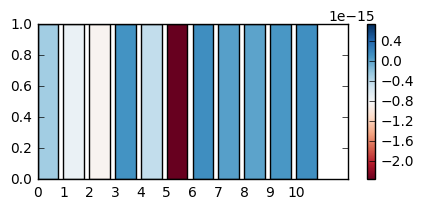

In [188]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_rw_rt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu
#cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_rw_rt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

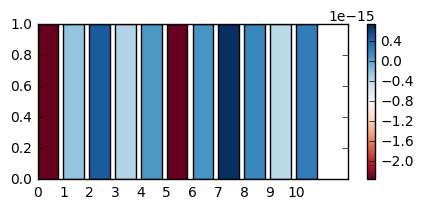

In [189]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_l = list(right_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_lw_rt = pd.DataFrame({"x":x,"y":y,"c":c_l})


#cmap = plt.cm.RdBu
cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_lw_rt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [156]:
right_turn_kine_new_df_filledna = right_turn_kine_new_df.fillna(0)

In [206]:
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
    
for flynum in fly_nums:
    df=(left_turn_kine.loc[left_turn_kine['fly_num']==flynum])
    #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    average_activity = np.mean(state_mtrx,axis = 1)[:,None]
    #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
left_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
left_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)


left_turn_kine_means_activity_df


['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide


,Muscles,centered_standard_means,fly
0,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.46710612028e-15], [4.28037792627e-17], [2...",1389
1,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[1.57898385724e-15], [-7.31011045021e-15], [-...",1390
2,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[4.68489715886e-16], [1.24930590903e-15], [8....",1391
3,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[2.62826797363e-14], [-9.59972841959e-15], [2...",1392
4,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[1.7763568394e-15], [4.93722709774e-15], [1.0...",1393
5,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.98105504433e-15], [2.21729648039e-15], [-...",1394
6,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-6.39068022695e-15], [8.45083372117e-15], [1...",1395
7,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-5.70062939865e-16], [-8.14375628378e-16], [...",1396
8,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[2.3234477291e-15], [-1.62101004356e-16], [-9...",1397
9,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[3.23012057353e-15], [4.94363460022e-16], [9....",1398


In [213]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(left_turn_kine_means_activity_df ['centered_standard_means'])

muscles = left_turn_kine_means_activity_df ['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

left_turn_kine_new_df = pd.DataFrame(d)
left_turn_kine_new_df.head()

left_turn_kine_new_df.to_csv('right_turn_kine_new_df.csv')


left_turn_kine_new_df_filledna = left_turn_kine_new_df.fillna(0)

right_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'right')]

left_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'left')]




import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_left_turn['averages_muscle_activity'])#*(10^100))
df_rw_lt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu


import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_l = list(right_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_lw_lt = pd.DataFrame({"x":x,"y":y,"c":c_l})



['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


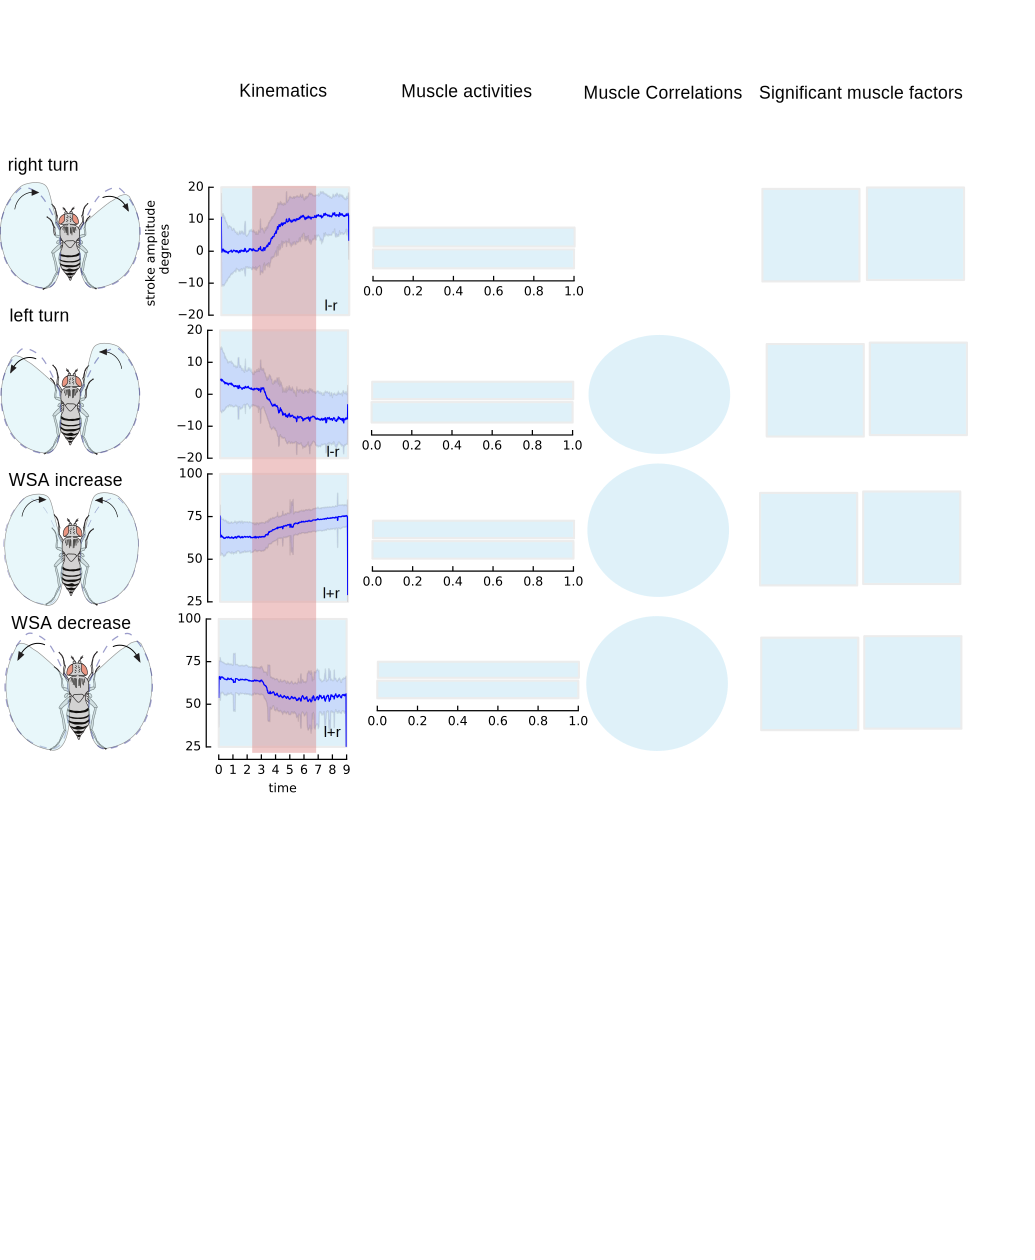

"\nlayout.axes['lm_matrix_rt'].set_title('left muscles')\nlayout.axes['lm_matrix_rt'].bar(df_rw_rt.x, df_rw_rt.y, color=cmap(norm(df_lw_rt.c.values))) #,'o',alpha = 0.2)\n#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)\n#layout.axes['lm_matrix_rt'].set_ybound(40, 100)\n#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')\n\n\nlayout.axes['rm_matrix_rt'].bar(df_rw_rt.x, df_rw_rt.y, color=cmap(norm(df_rw_rt.c.values))) #,'o',alpha = 0.2)\n#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)\nlayout.axes['rm_matrix_rt'].set_xlabel('right muscles')\nlayout.axes['rm_matrix_rt'].set_xbound(0, 11)\n#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])\nlayout.axes['rm_matrix_rt'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))\n\n\nlayout.axes['lm_matrix_lt'].set_title('left muscles')\nlayout.axes['lm_matrix_lt'].bar(df_rw_lt.x, df_rw_lt.y, colo

In [42]:



layout = fifi.FigureLayout('paper_figure_2_v4.svg',make_mplfigures = True)





#layout = fifi.FigureLayout('paper_figure_2_v3.svg',make_mplfigures = True)

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA)) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)),alpha = 0.1)
layout.axes['l_turn_lmr'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_turn_right)) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_turn_right-error_turn_right)), rad_to_deg(mean_WBA_turn_right + error_turn_right),alpha = 0.1)
layout.axes['r_turn_lmr'].set_ybound(-20, 20)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')
layout.axes['r_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['WSA_dec_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_increase)) #,'o',alpha = 0.2)
layout.axes['WSA_dec_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_increase-error_WSA_increase), rad_to_deg(mean_WBA_WSA_increase + error_WSA_increase),alpha = 0.1)
layout.axes['WSA_dec_lpr'].set_ybound(25, 100)
layout.axes['WSA_dec_lpr'].set_xlabel('time')
layout.axes['WSA_dec_lpr'].set_yticks([25, 50, 75, 100])

layout.axes['WSA_inc_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_decrease)) #,'o',alpha = 0.2)
layout.axes['WSA_inc_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_decrease-error_WSA_decrease), rad_to_deg(mean_WBA_WSA_decrease + error_WSA_decrease),alpha = 0.1)
layout.axes['WSA_inc_lpr'].set_ybound(25, 100)
layout.axes['WSA_inc_lpr'].set_yticks([25, 50, 75, 100])


fifi.mpl_functions.set_spines(layout)
layout.save('figure_2.svg')
plt.close('all')
display(SVG('figure_2.svg'))

#### now matrices

'''
layout.axes['lm_matrix_rt'].set_title('left muscles')
layout.axes['lm_matrix_rt'].bar(df_rw_rt.x, df_rw_rt.y, color=cmap(norm(df_lw_rt.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_rt'].bar(df_rw_rt.x, df_rw_rt.y, color=cmap(norm(df_rw_rt.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_rt'].set_xlabel('right muscles')
layout.axes['rm_matrix_rt'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_rt'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))


layout.axes['lm_matrix_lt'].set_title('left muscles')
layout.axes['lm_matrix_lt'].bar(df_rw_lt.x, df_rw_lt.y, color=cmap(norm(df_lw_lt.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_lt'].bar(df_rw_lt.x, df_rw_lt.y, color=cmap(norm(df_rw_lt.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_lt'].set_xlabel('right muscles')
layout.axes['rm_matrix_lt'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_lt'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))
'''




#fifi.mpl_functions.set_spines(layout)
#layout.save('figure_2_v2.svg')
#plt.close('all')
#display(SVG('figure_2_v2.svg'))